In [26]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import mglearn


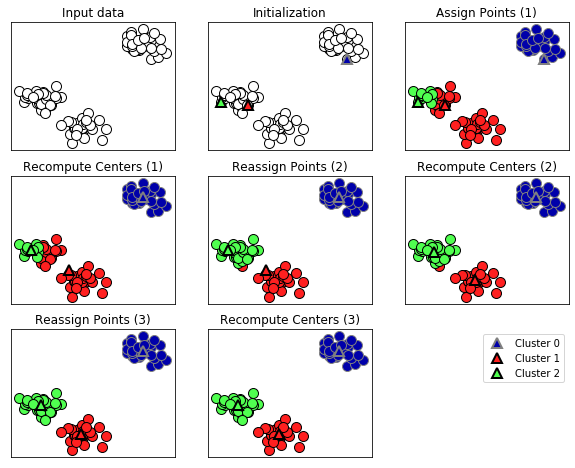

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [5]:
df = pd.read_csv('../data5/kmean.csv',index_col='Unnamed: 0')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


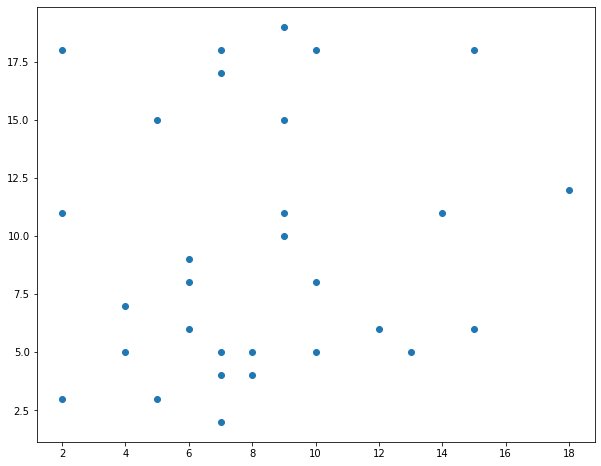

In [8]:
plt.figure(figsize = (10,8))
plt.scatter(df['x'],df['y'])
plt.show()

In [10]:
## 비지도 학습(군집분류)
k = KMeans(n_clusters=4)

In [12]:
# df에 특성데이터만 있기떄문에( 비지도 학습이기 떄문에)
km = k.fit( df )

In [17]:
cen = km.cluster_centers_


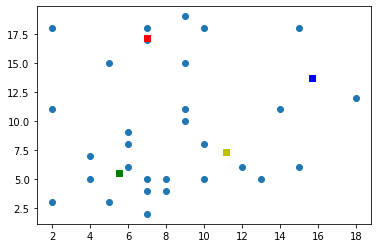

In [21]:
plt.scatter(df['x'],df['y'])
plt.scatter(cen[:,0],cen[:,1], marker= 's',c = ['r','g','b','y'])

In [22]:
km.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 3,
       3, 0, 3, 3, 2, 3, 2, 2])

In [25]:
df['label'] = km.labels_
df

,x,y,label
0,2,3,1
1,2,11,1
2,2,18,0
3,4,5,1
4,4,7,1
5,5,3,1
6,5,15,0
7,6,6,1
8,6,8,1
9,6,9,1


<Figure size 720x576 with 0 Axes>

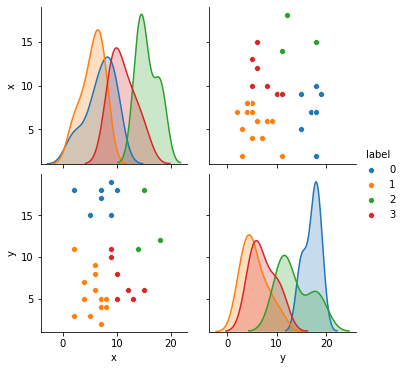

In [34]:
plt.figure(figsize = (10,8))
sns.pairplot( df , hue = 'label')
plt.show()

<Figure size 720x576 with 0 Axes>

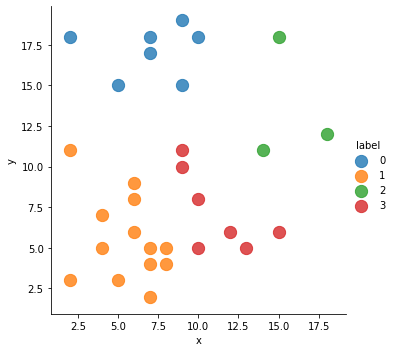

In [37]:
plt.figure(figsize = (10,8))
sns.lmplot( x='x', y='y', data=df, fit_reg = False, hue = 'label',
          scatter_kws = {'s' : 150}  )
plt.show()

## 연습문제

## iris data 를 이용하여 최적의 분류 갯수(n_clusters)를 찾고  kmeans로 군집분류를
## 수행하시오

In [42]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

# from sklearn.svm import SVC, SVR
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC  # SVM
from sklearn import metrics

In [39]:
iris = load_iris()

In [40]:
x_data = iris.data
y_data = iris.target

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    stratify = y_data
                                                   )

In [56]:
kmean = KMeans(n_clusters=8)
# param = {'n_clusters' : [i for i in range(2,10)],
#          'init': ['k-means++', 'random'],
#          'max_iter': [i for i in range(300,600,100)]
#         }
# gridk = GridSearchCV( kmean , param_grid=param,verbose = 1,)
kmean.fit(x_data)
# gridk.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
gridk.best_params_

{'init': 'k-means++', 'max_iter': 500, 'n_clusters': 8}

In [57]:
kmean.cluster_centers_

array([[6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [5.24285714, 2.37142857, 3.44285714, 1.02857143],
       [5.62857143, 2.72380952, 4.13333333, 1.2952381 ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444]])

In [58]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [59]:
model = KMeans(n_clusters=3)
kmm = model.fit(x_data)

In [62]:
kmm.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [75]:
irisDF = pd.DataFrame(iris['data'])
irisDF['label'] = kmm.labels_
irisDF

,0,1,2,3,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Figure size 720x576 with 0 Axes>

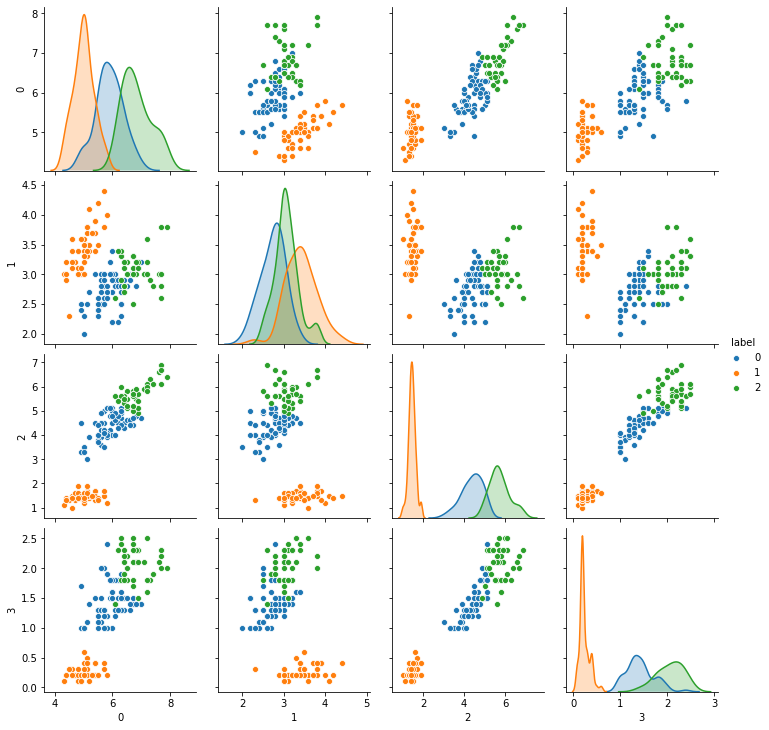

In [67]:
plt.figure(figsize = (10,8))
sns.pairplot( irisDF , hue = 'label')
plt.show()

In [68]:
# 각센터를 중심으로 떨어진 거리의 총합의 평균
# 1,2,3 각각의 거리 평균  : (1번평균+2번평균+3번평균)/3
# 이값이 적을수록 군집이 더 촘촘하다
kmm.inertia_

78.85144142614601

In [69]:
data = []
for n in range(1,11):
    model = KMeans( n_clusters=n )
    km = model.fit( iris[ 'data'] )
    data.append(km.inertia_)
data

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.74204530600119,
 30.06459307359308,
 27.862911312371843,
 26.22026133180545]

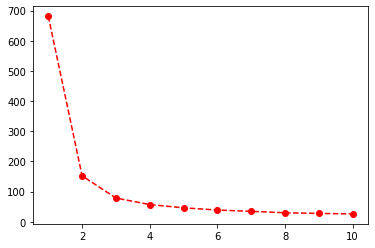

In [74]:
# 차트가 평평해지기 바로앞의 점이 최적점
plt.plot(range(1,11),data,'ro--')
plt.show()